In [54]:
import form_digitization_main
import cv2
import display_utils
import matplotlib.pyplot as plt
import os
import random
import math
import numpy as np

In [55]:
files = []
for r,d,f in os.walk("/home/local/ZOHOCORP/shiva-8700/forms/datasets/image_pdf_internet/"):
    for i in f:
        files.append("/home/local/ZOHOCORP/shiva-8700/forms/datasets/image_pdf_internet/" + i)
len(files)

2540

In [56]:
img = cv2.imread(files[random.randint(0, len(files))])
cimg = img.copy()
obj = form_digitization_main.testing()
process = obj.process(img)

FORM field model time :  6.053918361663818
post processing ::  0.005836009979248047


In [57]:
process

In [58]:
#process.document_features.document_elements

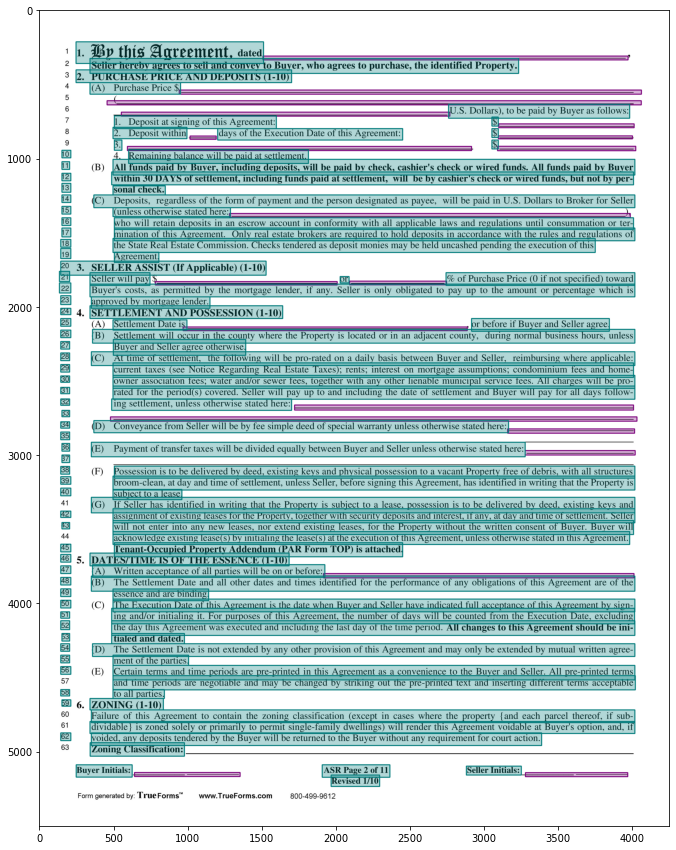

In [59]:

image = display_utils.generate_output(img, process)
plt.figure(figsize=(15, 15))
plt.imshow(image)
plt.show()

In [68]:
## angle between bounding box
key1, key2 = random.sample(list(process.document_features.document_elements.keys()), 2)
box1 = process.document_features.document_elements[key1]
box2 = process.document_features.document_elements[key2]


In [69]:
math.degrees(math.atan2( -1 , 1))

-45.0

In [74]:
def angle_between_boxes(b1, b2):
    """ calculate the angle between the source b1 and the target box b2"""
    point_1 = ((b1.x1 + b1.x2)/2, (b1.y1 + b1.y2)/2)
    point_2 = ((b2.x1 + b2.x2)/2, (b2.y1 + b2.y2)/2)
    #angle = (point_2[1] - point_1[1]) , (point_2[0] - point_1[0])
    angle = math.degrees(math.atan2(-(point_2[1] - point_1[1]) , (point_2[0] - point_1[0])))
    return angle

In [75]:
print(angle_between_boxes(box1, box2))

-155.4895720080035


-113.2460179795014


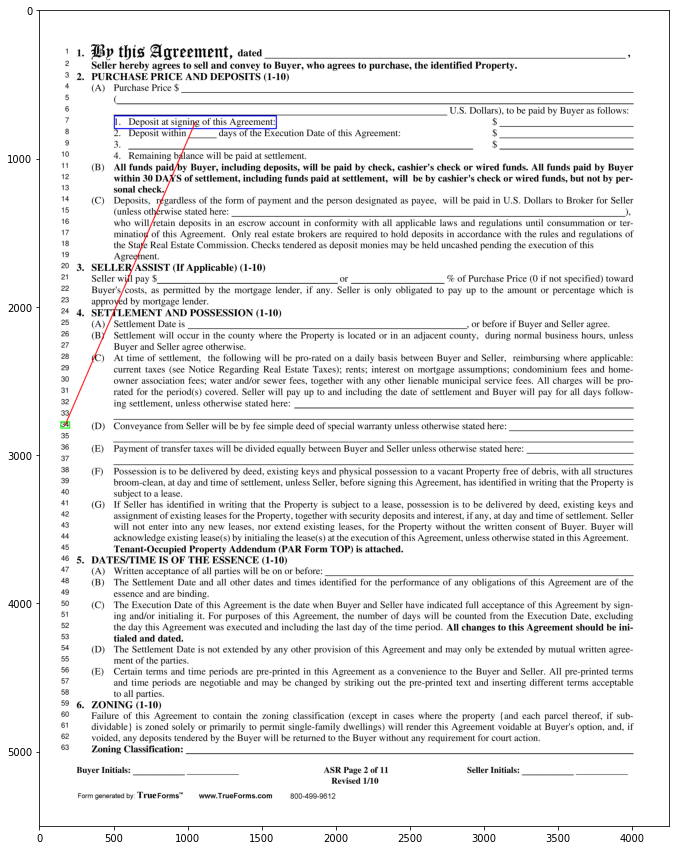

In [79]:
c1img = cimg.copy()
key1, key2 = random.sample(list(process.document_features.document_elements.keys()), 2)
box1 = process.document_features.document_elements[key1]
box2 = process.document_features.document_elements[key2]
print(angle_between_boxes(box1, box2))
cv2.rectangle(c1img, (box1.x1, box1.y1), (box1.x2, box1.y2), (0, 0, 255), 5)
cv2.rectangle(c1img, (box2.x1, box2.y1), (box2.x2, box2.y2), (0, 255, 0), 5)
point_1 = ((box1.x1 + box1.x2)//2, (box1.y1 + box1.y2)//2)
point_2 = ((box2.x1 + box2.x2)//2, (box2.y1 + box2.y2)//2)
cv2.line(c1img, point_1, point_2, (255, 0, 0), 5)
plt.figure(figsize=(15, 15))
plt.imshow(c1img)
plt.show()

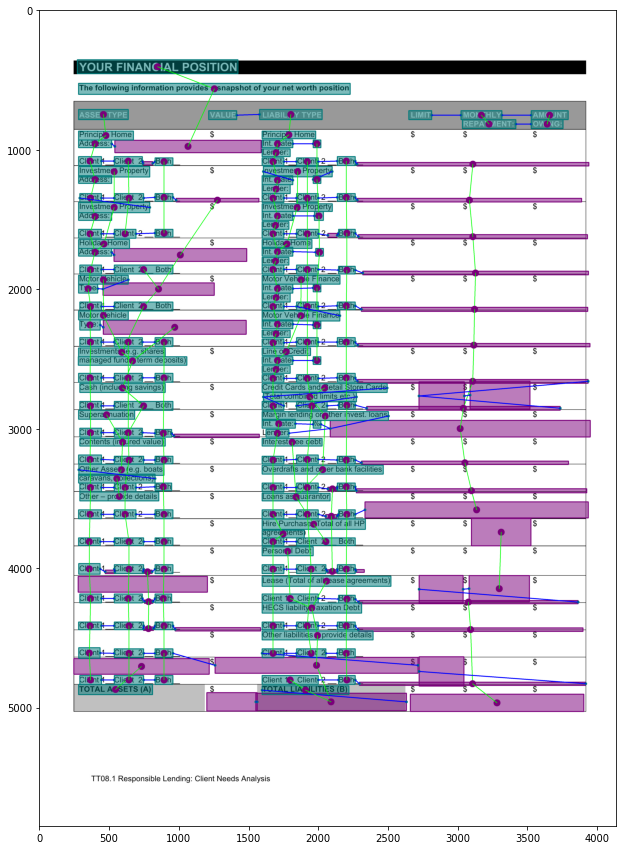

In [7]:
image = display_utils.plot_line_of_sight(process, img)
plt.figure(figsize=(15, 15))
plt.imshow(image)
plt.show()

In [9]:
tmpid = random.randint(0, len(process.document_features.form_element_id))
idx = process.document_features.form_element_id[tmpid]

In [10]:
len(process.document_features.form_element_id)

44

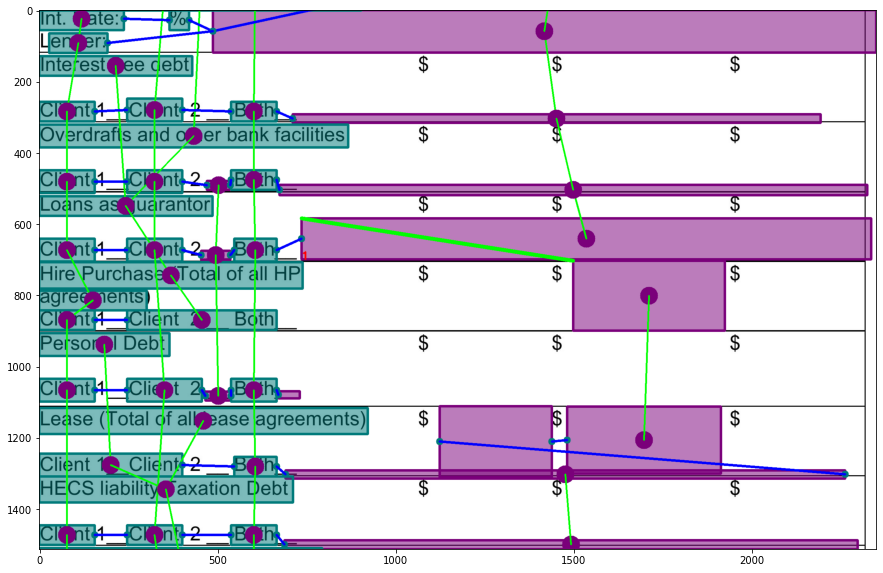

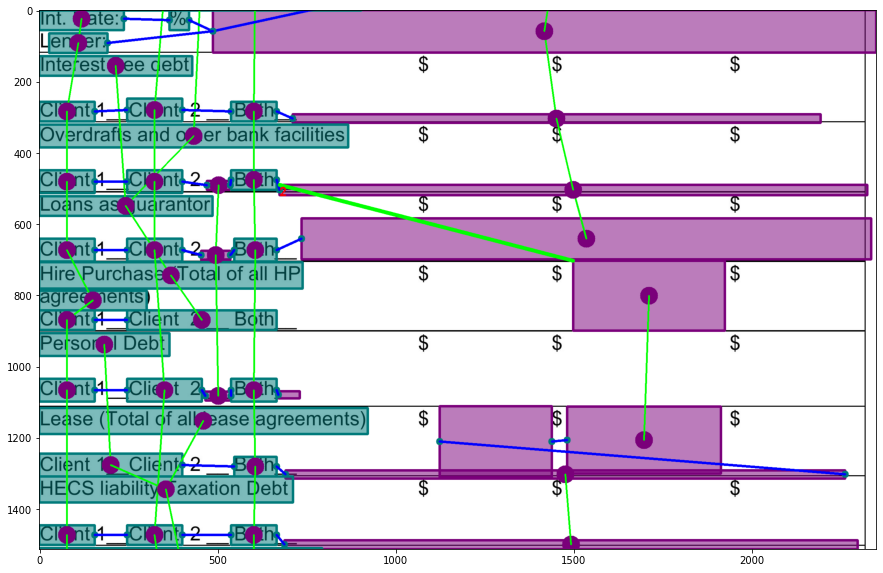

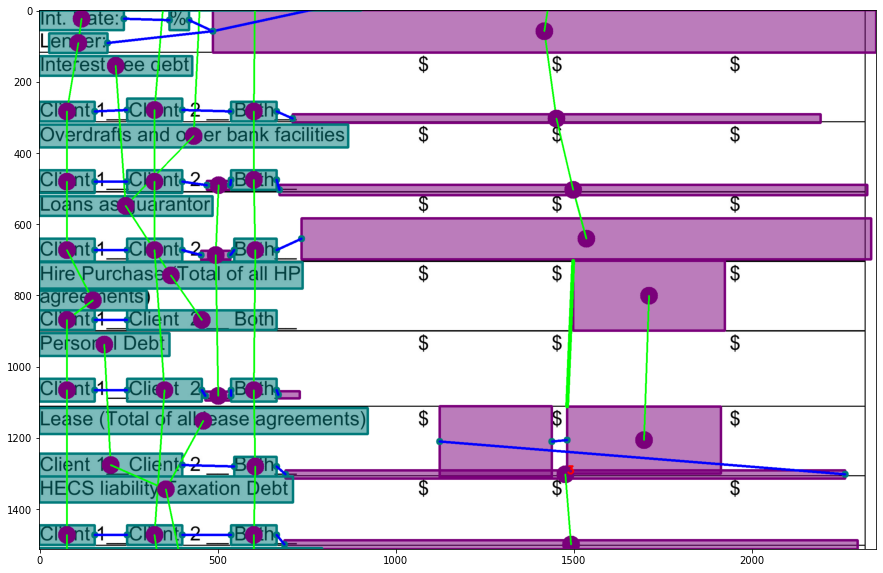

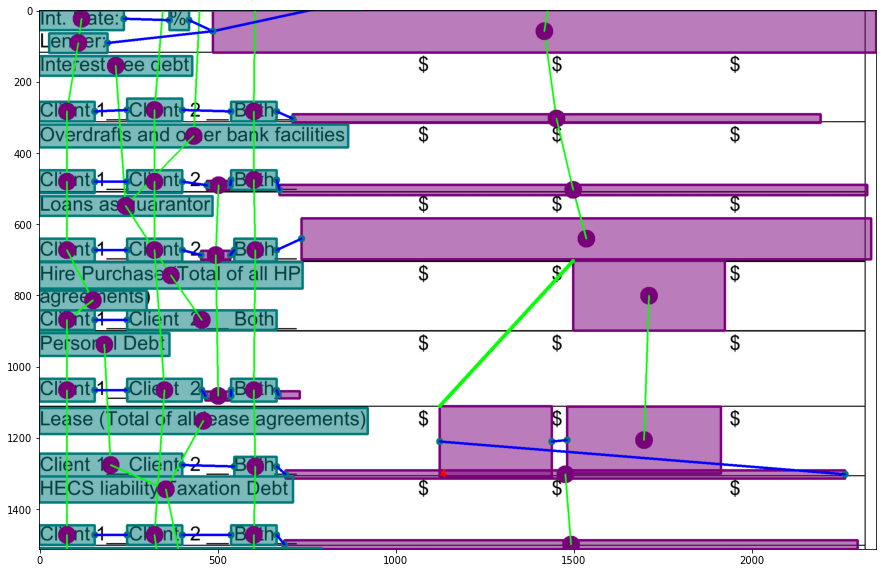

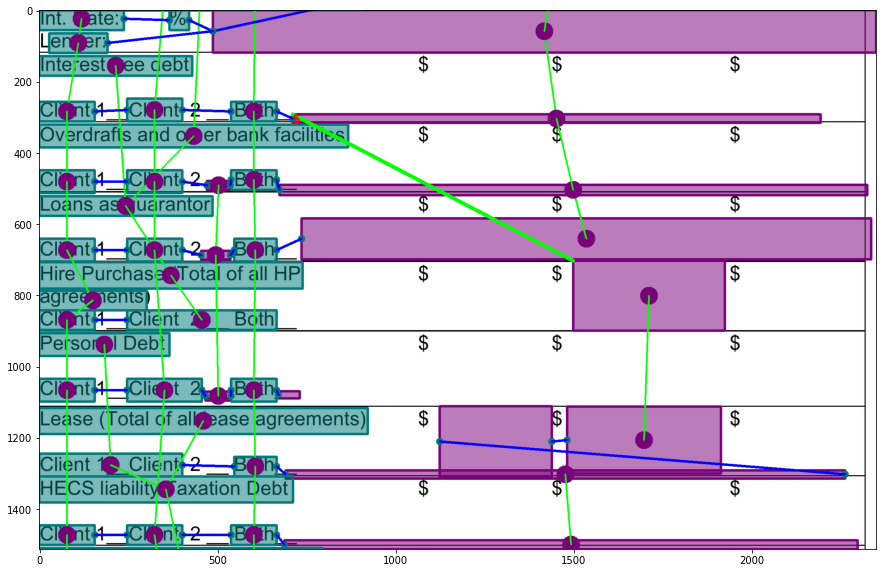

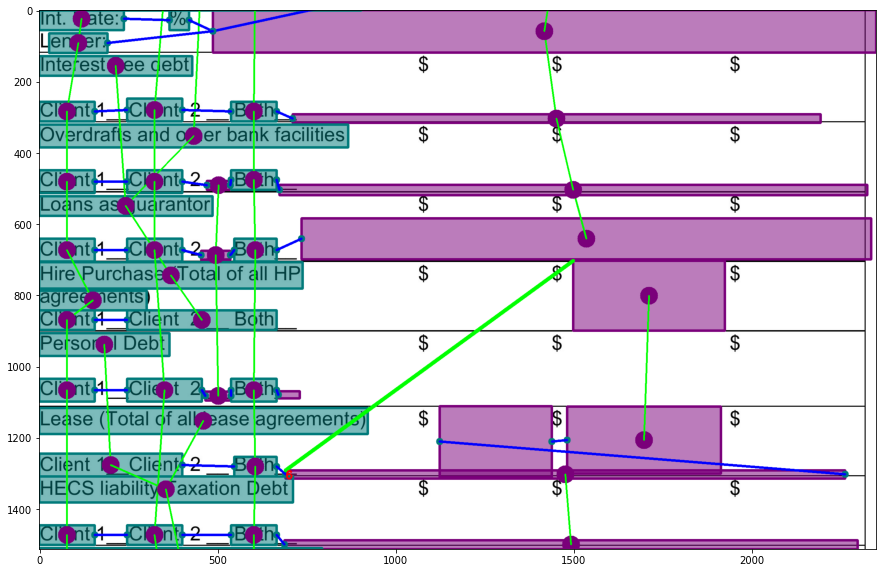

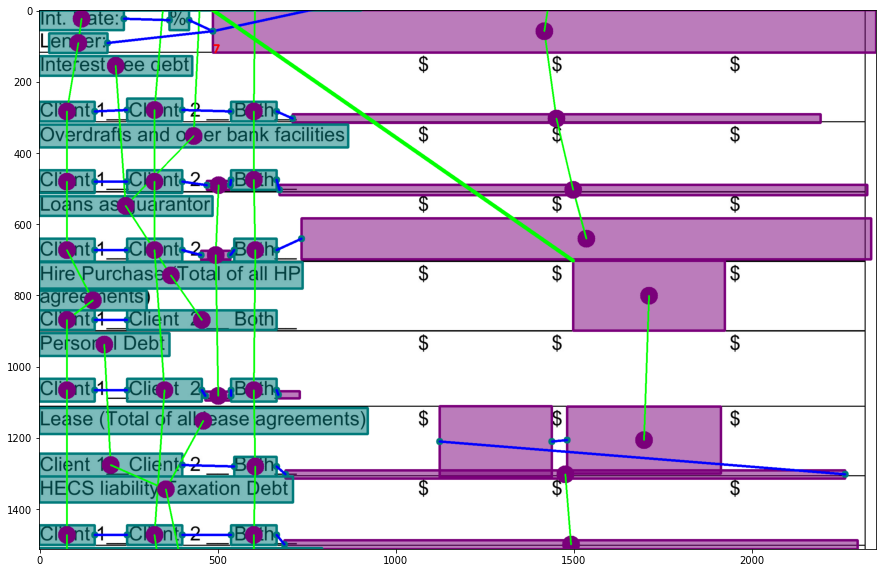

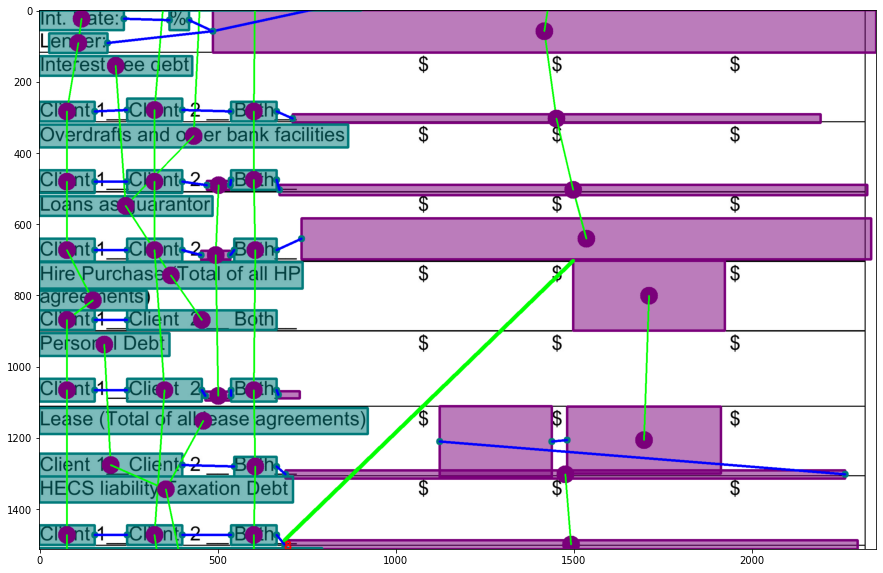

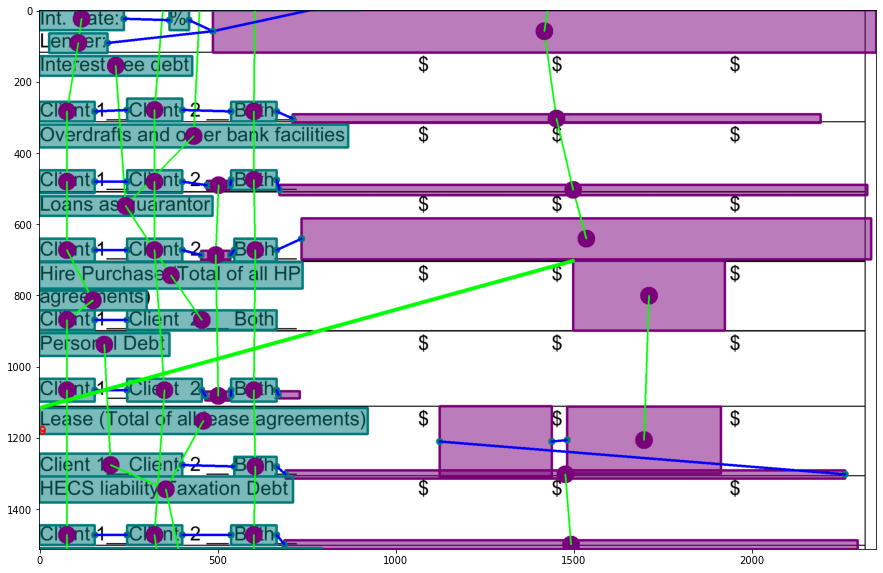

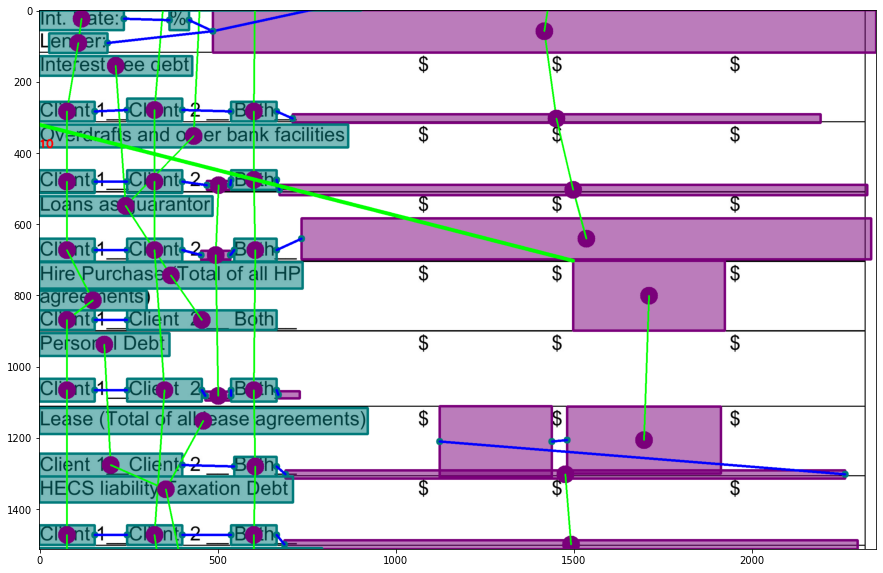

In [11]:
list_img = display_utils.add_neighbors(process, img, idx, 10)
for l in list_img:
    plt.figure(figsize=(15, 15))
    #print(l.shape)
    plt.imshow(l)
    plt.show()

In [ ]:
process.document_features.document_elements